### Preparation - Review raw usage data

In [80]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
from matplotlib import pyplot as plt
import datetime
import numpy as np
import math
import plot_helper as ph

CSV_FILE = '../data/GAM Booking Report 20180209.csv'

df_raw = pd.read_csv(CSV_FILE,encoding="ISO-8859-1",parse_dates=['Order Date'])

df_vspp = df_raw[df_raw['Product SKU'].str.match(r'.*VSPP*')]

In [88]:
for k, _df in df_vspp.groupby(['Fiscal Quarter','Fiscal Month Name','Fiscal Week Of Quarter']):
    print(k)


('18Q1', 'Apr', 9.0)
('18Q1', 'Apr', 10.0)
('18Q1', 'Apr', 11.0)
('18Q1', 'Apr', 12.0)
('18Q1', 'Apr', 13.0)
('18Q1', 'Feb', 1.0)
('18Q1', 'Feb', 2.0)
('18Q1', 'Feb', 3.0)
('18Q1', 'Feb', 4.0)
('18Q1', 'Mar', 5.0)
('18Q1', 'Mar', 6.0)
('18Q1', 'Mar', 7.0)
('18Q1', 'Mar', 8.0)
('18Q2', 'Jul', 9.0)
('18Q2', 'Jul', 10.0)
('18Q2', 'Jul', 11.0)
('18Q2', 'Jul', 12.0)
('18Q2', 'Jul', 13.0)
('18Q2', 'Jun', 5.0)
('18Q2', 'Jun', 6.0)
('18Q2', 'Jun', 7.0)
('18Q2', 'Jun', 8.0)
('18Q2', 'May', 1.0)
('18Q2', 'May', 2.0)
('18Q2', 'May', 3.0)
('18Q2', 'May', 4.0)
('18Q3', 'Aug', 1.0)
('18Q3', 'Aug', 2.0)
('18Q3', 'Aug', 3.0)
('18Q3', 'Aug', 4.0)
('18Q3', 'Oct', 9.0)
('18Q3', 'Oct', 10.0)
('18Q3', 'Oct', 11.0)
('18Q3', 'Oct', 12.0)
('18Q3', 'Oct', 13.0)
('18Q3', 'Sep', 5.0)
('18Q3', 'Sep', 6.0)
('18Q3', 'Sep', 7.0)
('18Q3', 'Sep', 8.0)
('18Q4', 'Dec', 5.0)
('18Q4', 'Dec', 6.0)
('18Q4', 'Dec', 7.0)
('18Q4', 'Dec', 8.0)
('18Q4', 'Jan', 9.0)
('18Q4', 'Jan', 10.0)
('18Q4', 'Jan', 11.0)
('18Q4', 'Jan', 12.0

In [32]:
def first_date_of_month(x):
    if(math.isnan(x.year)):
        return math.nan
    else:
        return datetime.date(x.year,x.month,1)


CMO_month = list(map(lambda x: first_date_of_month(pd.Timestamp(x)),df_vspp['Cmo'].values))
df_vspp['CMO_month'] = pd.Series(CMO_month,index=df_vspp.index)

No handles with labels found to put in legend.


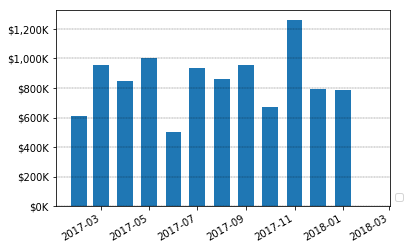

In [79]:
ntt_showcase = set([x.upper() for x in [
    'NTT America',
    'NTT America, Inc. SME',
    'NTT BizLink, Inc.',
    'NTT Com Asia Limited',
    'NTT Com ICT Solutions (Australia) Pty Ltd',
    'NTT Communications (Thailand) Co.,Ltd.',
    'NTT Communications China Co., Ltd.',
    'NTT Communications Corporation',
    'NTT Communications Corporation Australia Office',
    'NTT Communications Corporation Bangkok Office',
    'NTT Communications Corporation Barcelona Office',
    'NTT Communications Corporation Cyberjaya Office',
    'NTT Communications Corporation Frankfurt Office',
    'NTT Communications Corporation Hong Kong Office',
    'NTT Communications Corporation London Office',
    'NTT Communications Corporation New York Office',
    'NTT Communications Corporation Paris Office',
    'NTT Communications Corporation Singapore Office',
    'NTT Communications Russia',
    'NTT Europe',
    'NTT Europe Limited',
    'NTT Europe Ltd',
    'NTT EUROPE ONLINE GMBH',
    'NTT MSC Sdn Bhd',
    'NTT NEOMEIT Corporation',
    'NTT Singapore PTE Ltd',
    'NTT SMARTCONNECT Corporation',
    'NTTPC Communications,Inc.'
]])

ntt_all = set(df_vspp[df_vspp['Reseller'].str.match(r'.*NTT*')]['Reseller'].drop_duplicates().values)

#def pr_mark(f):
#    return '*' if f else '-'
#for sp in (sorted(resellers | ntt_showcase)):
#    print("{:64s} {} {}".format(sp,pr_mark(sp in ntt_showcase),pr_mark(sp in resellers)))


f = list(map(lambda x: x in ntt_all, df_vspp['Reseller'].values))
s_rev = df_vspp[f].groupby('CMO_month')['Detail Total'].sum()


#s_rev = df_vspp[df_vspp['Reseller'].str.match(r'.*DIMENSION*')].groupby('CMO_month')['Detail Total'].sum()
plt.bar(s_rev.index,s_rev.values,width=20)

ph.format_trend_chart()
plt.show()


### Preparation - Configure QUARTER_RANGE in defines.py

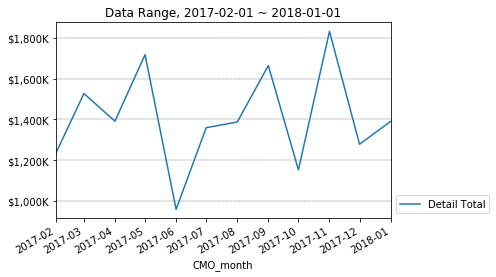

In [14]:
END_QUARTER = [
               datetime.date(2017,11,1),
               datetime.date(2017,12,1),
               datetime.date(2018,1,1)
               ]
YEAR_AGO_QUARTER = list(map(lambda x: x.replace(year=x.year-1),END_QUARTER))

START_QUARTER = [
                datetime.date(2017,2,1),
                datetime.date(2017,3,1),
                datetime.date(2017,4,1)
                ]

QUARTER_RANGE = (START_QUARTER,END_QUARTER)

START_MONTH = QUARTER_RANGE[0][0]
END_MONTH = QUARTER_RANGE[1][2]

df = df_rental[(df_rental['CMO_month']<=END_MONTH) & 
               (df_rental['CMO_month']>=START_MONTH)]

df.groupby('CMO_month')['Detail Total'].sum().plot()
format_trend_chart()
plt.title("Data Range, {} ~ {}".format(START_MONTH,END_MONTH))
plt.show()



### Showcase Partner - Group Companies Revenue Trend

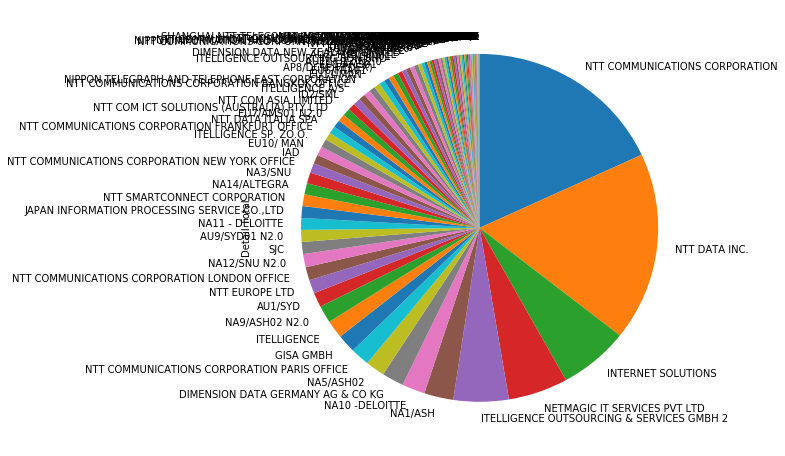

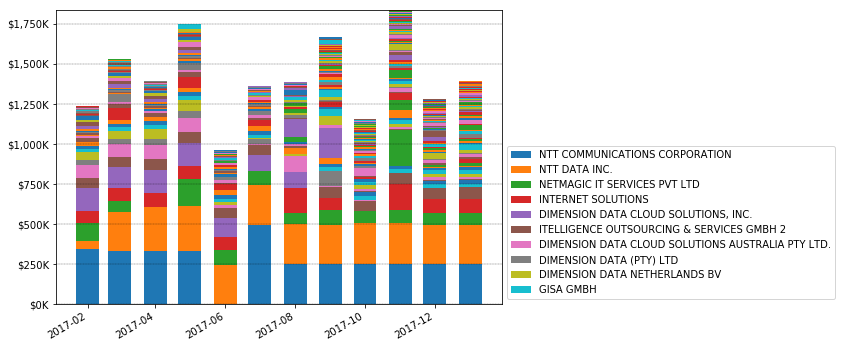

In [25]:
col_date='CMO_month'
col_sp='Ship To Organization'
col_revenue='Detail Total'

rev_last_sorted = df[df[col_date] == END_MONTH].groupby(col_sp)[col_revenue].sum().sort_values(ascending=False)    
rev_last_sorted.plot.pie(startangle=90,counterclock=False)
plt.gcf().set_size_inches(8,8)
plt.show() 

# sp sorted by revenue
rev_sorted = df.groupby(col_sp)[col_revenue].sum().sort_values(ascending=False)

# series of date
index = df.groupby(col_date)[col_revenue].sum().index
    
prev_bar = 0
for i,sp in enumerate(rev_sorted.index):
    rev_by_period = df[df[col_sp] == sp].groupby(col_date)[col_revenue].sum() 
    for rev_date in index:
        if not rev_date in rev_by_period.keys():
            rev_by_period.set_value(rev_date,0.0)
        rev_by_period = rev_by_period.sort_index()
 
    if i>=10:
        sp=None
    plt.bar(rev_by_period.index,rev_by_period.values,width=20,label=sp,bottom=prev_bar)
    prev_bar += rev_by_period.values
        
format_trend_chart()

plt.gcf().set_size_inches(8,6)
plt.show()

In [1]:
import size_vs_growth as sg
    
sg.plot(df[(df['Partner Status']=='Showcase')],
    {'type':['NO_SLICE'],
     'min_rev_growth':10000,
    'show_sp_name':0},group_key='Partner Group Name')

NameError: name 'df' is not defined

### Revenue Size vs Growth

Softlayer Technologies, Inc.             United States    (AMER) $ 4,022,272 (2,715%)
Rackspace US, Inc                        United States    (AMER) $   524,254 (23%)
SAVVIS                                   United States    (AMER) $ 1,940,589 (242%)
OVH                                      France           (EMEA) $   914,364 (70%)
Hewlett-Packard Enterprise Company       United States    (AMER) $ 1,053,026 (304%)
Canopy the Open Cloud Company            United Kingdom   (EMEA) $ 1,196,351 (1,008%)
IBM                                      United States    (AMER) $ 1,069,586 (479%)
Virtustream                              United States    (AMER) $   583,850 (201%)
Fujitsu Limited (Japan)                  Japan            (APAC) $   729,172 (518%)


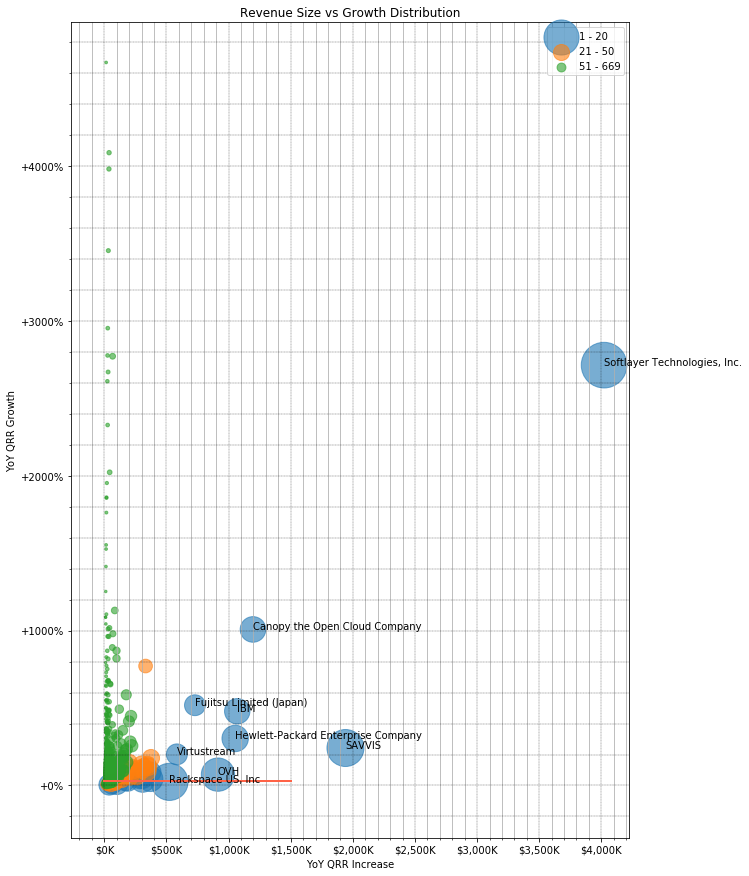

Rackspace US, Inc                        United States    (AMER) $   524,254 (23%)
SAVVIS                                   United States    (AMER) $ 1,940,589 (242%)
Hewlett-Packard Enterprise Company       United States    (AMER) $ 1,053,026 (304%)
IBM                                      United States    (AMER) $ 1,069,586 (479%)
Virtustream                              United States    (AMER) $   583,850 (201%)
Fujitsu Limited (Japan)                  Japan            (APAC) $   729,172 (518%)
Canopy the Open Cloud Company            United Kingdom   (EMEA) $ 1,196,351 (1,008%)
Canopy the Open Cloud Company            United Kingdom   (EMEA) $ 1,196,351 (1,008%)


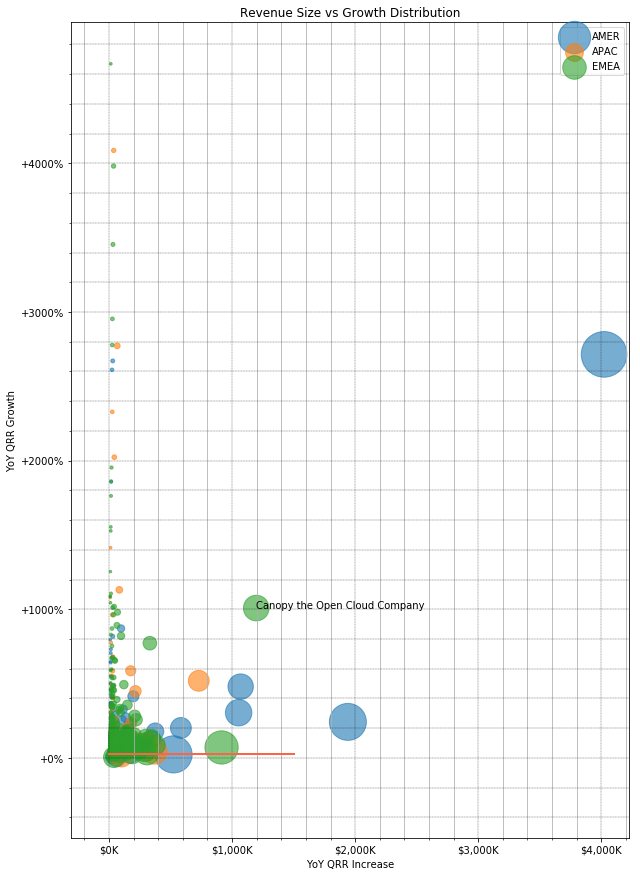

Internet Initiative Japan Inc.           Japan            (APAC) $   370,395 (42%)
NTT Communications Corporation           Japan            (APAC) $   100,874 (12%)
Fujitsu Limited (Japan)                  Japan            (APAC) $   729,172 (518%)
SoftBank Corp.                           Japan            (APAC) $   214,544 (126%)
NEC Corporation                          Japan            (APAC) $   214,523 (448%)
KDDI Corporation                         Japan            (APAC) $   124,926 (106%)
NS Solutions Corporation                 Japan            (APAC) $   132,893 (197%)


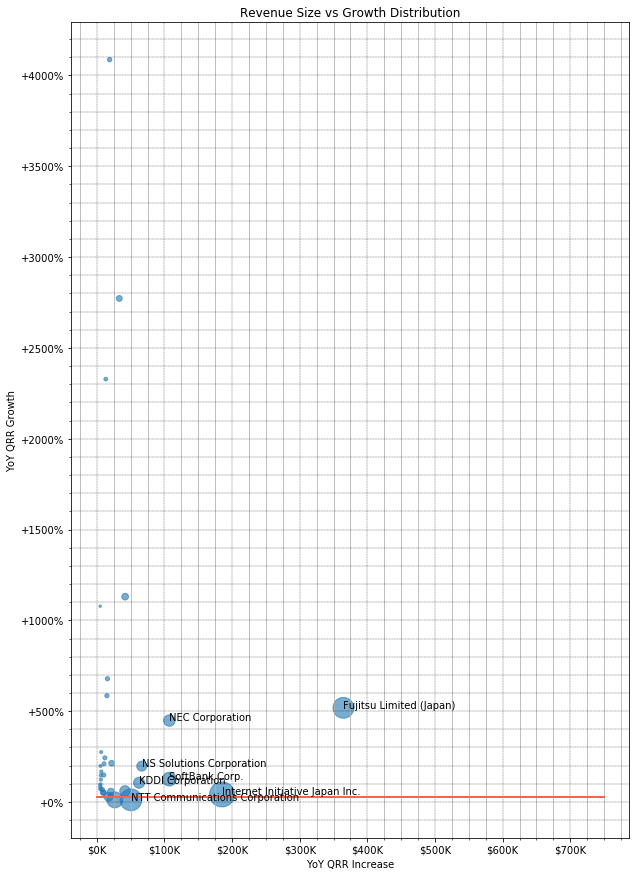

In [12]:
import size_vs_growth as sg

sg.plot(df,
     {'type':['GEO','RANK'],
      'time_frame': 'LAST_12',
      'min_rev_growth':10000,
      'show_sp_name':500000})
    
sg.plot(df[(df['Country']=='Japan')],
    {'type':['NO_SLICE'],
     'time_frame': 'LAST_12',     
     'min_rev_growth':10000,
    'show_sp_name':100000})

In [13]:
def print_mom_growth(s):
    for i,d in enumerate((s/s.shift(1)-1)*100):
        print('---') if s.index[i].month % 3 == 2 else None
        print('{:%b %Y} {:6.2f}%'.format(s.index[i],d))

def s_usage_point(df,g='ALL'):
    if g != 'ALL':
        df = df[df['Partner Group Name']==g]
    return df.groupby('Usage Period')['Usage Points'].sum()

# print_mom_growth(s_usage_point(df))
print('NTT')
print_mom_growth(s_usage_point(df,g='NTT'))
print('Fujitsu')
print_mom_growth(s_usage_point(df,g='Fujitsu'))




NTT
Jan 2016    nan%
---
Feb 2016   2.26%
Mar 2016   2.63%
Apr 2016   2.86%
---
May 2016   3.71%
Jun 2016   1.32%
Jul 2016   0.34%
---
Aug 2016   0.90%
Sep 2016   1.11%
Oct 2016   1.90%
---
Nov 2016   4.14%
Dec 2016  -0.06%
Jan 2017  -0.79%
---
Feb 2017  -3.12%
Mar 2017  -0.54%
Apr 2017  -0.68%
---
May 2017 -57.38%
Jun 2017 279.50%
Jul 2017 -38.77%
---
Aug 2017   0.41%
Sep 2017  12.89%
Oct 2017  -6.99%
---
Nov 2017  -4.41%
Dec 2017   4.08%
Fujitsu
Jan 2016    nan%
---
Feb 2016   0.61%
Mar 2016  -3.25%
Apr 2016 -10.59%
---
May 2016   8.66%
Jun 2016   3.01%
Jul 2016   4.19%
---
Aug 2016   0.58%
Sep 2016  11.83%
Oct 2016   0.21%
---
Nov 2016   2.00%
Dec 2016  -0.53%
Jan 2017   0.47%
---
Feb 2017   1.22%
Mar 2017   3.02%
Apr 2017  13.30%
---
May 2017  27.81%
Jun 2017 -34.84%
Jul 2017  12.20%
---
Aug 2017   6.93%
Sep 2017   0.06%
Oct 2017   0.74%
---
Nov 2017   2.13%
Dec 2017   0.76%


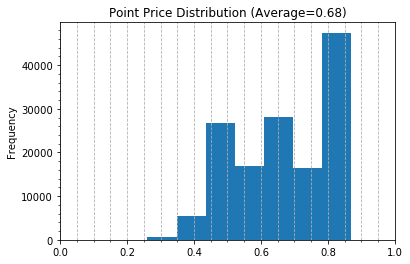

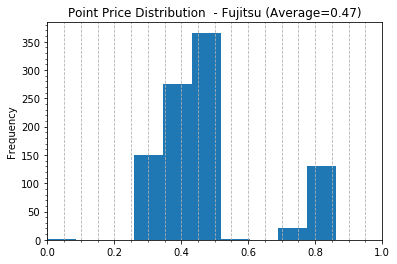

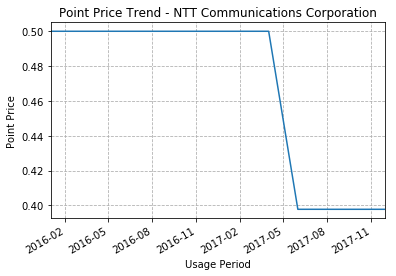

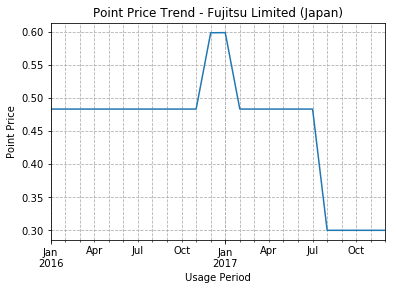

In [4]:
def plot_dist(d,caption=''):
    pp = d['Value (USD)']/d['Usage Points']

    pp.plot.hist(bins=10)
    plt.minorticks_on()
    plt.gca().xaxis.grid(True, which='both',linestyle='dashed')
    plt.xlim([0,1.0])
    plt.title("Point Price Distribution {}(Average={:.2f})".format(caption,pp.mean()))
    plt.show()

_df = df[df['Usage Points'] > 0]
_df_fujitsu = _df[_df['Partner Group Name']=='Fujitsu'].copy()

plot_dist(_df)
plot_dist(_df_fujitsu,caption=' - Fujitsu ')

def point_price_trend(sp):
    _df_sp = _df[_df['Service Provider']==sp].copy()
#    _df_sp = _df[_df['Partner Group Name']==sp].copy()
    _df_sp.loc[:,'Point Price'] = pd.Series(_df_sp['Value (USD)']/_df_sp['Usage Points'],index=_df_sp.index)

    _df_sp.groupby('Usage Period')['Point Price'].max().plot()
    plt.ylabel('Point Price')
    plt.gca().xaxis.grid(True, which='both',linestyle='dashed')
    plt.gca().yaxis.grid(True, which='both',linestyle='dashed')
    plt.title('Point Price Trend - {}'.format(sp))
    plt.show()
    

point_price_trend('NTT Communications Corporation')
point_price_trend('Fujitsu Limited (Japan)')





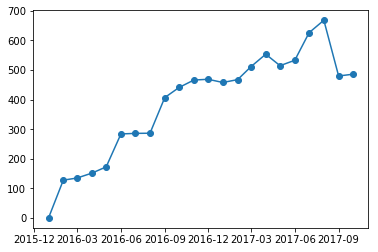

In [222]:
s_nifty = df[(df['Service Provider'].str.match(r'.*FUJITSU CLOUD.*')) | (df['Service Provider'].str.match(r'.*NIFTY.*'))].groupby('Usage Period')['Value (USD)'].sum()

start = s_nifty.values[0]

plt.plot(s_nifty.index,(s_nifty.values/start-1)*100,'o-',label='Nifty Revenue')
#format_trend_chart()
plt.show()

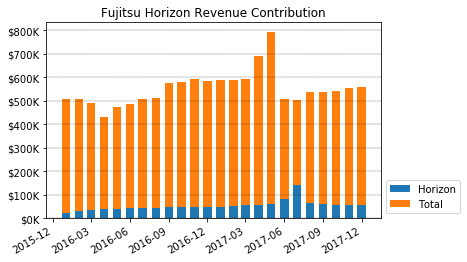

In [7]:
df_f = df[df['Partner Group Name']=='Fujitsu']
df_f_h = df_f[df_f['Product'].str.match(r'.*Horizon.*')]

total = df_f.groupby('Usage Period')['Value (USD)'].sum()
horizon = df_f_h.groupby('Usage Period')['Value (USD)'].sum()

plt.bar(total.index,horizon.values,20,label='Horizon')
plt.bar(total.index,total.values-horizon.values,20,label='Total',bottom=horizon.values)

format_trend_chart()
plt.title('Fujitsu Horizon Revenue Contribution')
plt.show()
    
#(df['Product Group']=='Horizon']
